<a href="https://colab.research.google.com/github/lorransr/tripdetection/blob/master/EDA_Trips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Trips

Esse notebook visa realizar uma análise inicial dos dados a respeito das viagens de carro monitoradas através do aplicativo *sensor-record*. O objetivo no presente momento consiste em identificar através do estado normal de descanso do veículo um posicionamento padrão e, a partir do mesmo poder dizer, através do desvio dessa posição padrão qual movimento esta sendo executado no carro a cada momento.

In [0]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
root = "https://raw.githubusercontent.com/lorransr/tripdetection/master/Trips"
folders = ["2019-08-21_19-24-53"]
files = ["Accelerometer","AccelerometerLinear","GPS","Gyroscope"]
urls = []
for folder in folders:
  for file in files:
    urls.append(root+"/"+folder+"/"+file+".csv")

In [0]:
raw_acc = pd.read_csv(urls[0])

In [0]:
def set_ts(raw):
  df = raw.copy()
  df.Timestamp = pd.to_datetime(df.Timestamp)
  df.Milliseconds = pd.to_timedelta(df.Milliseconds,"ms")

  df["ts"] = df.Timestamp+df.Milliseconds
  df.drop(["Timestamp","Milliseconds"],axis=1,inplace=True)
  df.set_index("ts",inplace=True)
  return df

In [0]:
acc = set_ts(raw_acc)

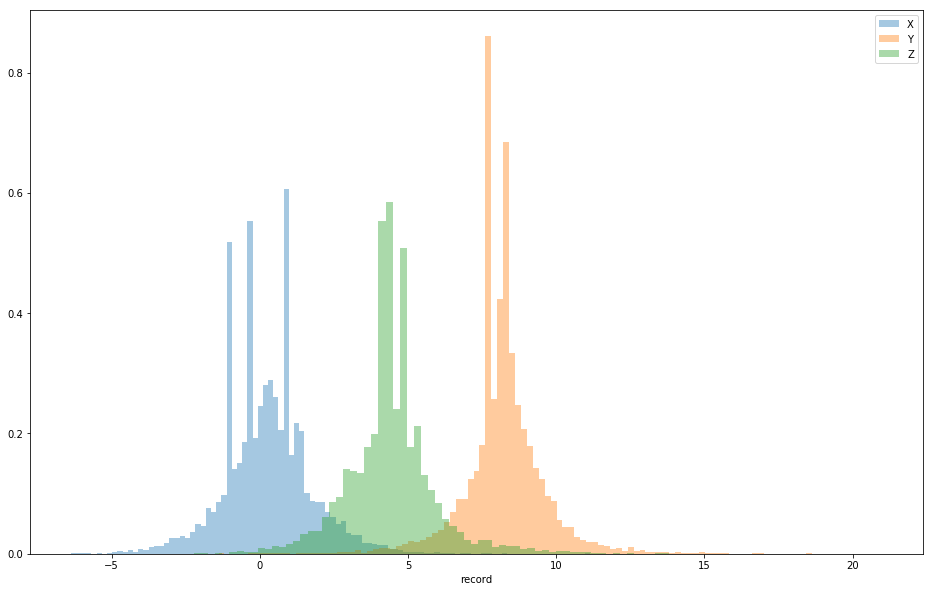

In [7]:
#visualizando destribuições
plt.figure(figsize=(16,10))
sns.distplot(acc["X"],kde=False,norm_hist=True,bins=100,label="X")
sns.distplot(acc["Y"],kde=False,norm_hist=True,bins=100,label="Y")
sns.distplot(acc["Z"],kde=False,norm_hist=True,bins=100,label="Z")
plt.xlabel("record")
plt.legend()

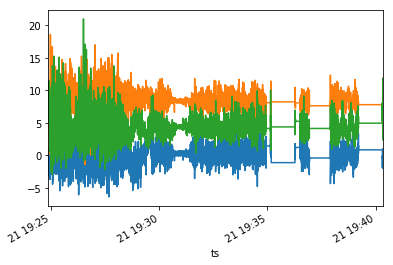

In [16]:
acc.X.plot()
acc.Y.plot()
acc.Z.plot()

In [0]:
acc_diff1 = acc.diff(1)
acc_diff1 = acc_diff1[(acc_diff1.T != 0).any()]

In [25]:
acc_diff1.head()

,X,Y,Z
ts,,,
2019-08-21 19:24:53.024,NaN,NaN,NaN
2019-08-21 19:24:53.073,0.608124,0.177170,2.317596
2019-08-21 19:24:54.124,0.253784,-0.562637,-0.617706
2019-08-21 19:24:54.173,-0.677551,0.088592,-2.633621
2019-08-21 19:24:54.223,-0.615311,1.350327,1.934509


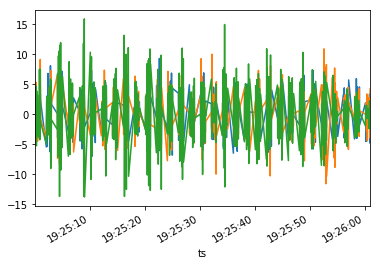

In [30]:
acc_diff1["2019-08-21 19:25:00":"2019-08-21 19:26:00"].X.plot()
acc_diff1["2019-08-21 19:25:00":"2019-08-21 19:26:00"].Y.plot()
acc_diff1["2019-08-21 19:25:00":"2019-08-21 19:26:00"].Z.plot()

In [0]:
acc_diff2 = acc_diff1.abs().diff(1)

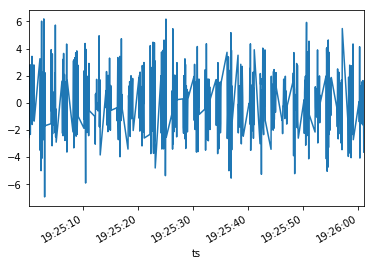

In [34]:
acc_diff2["2019-08-21 19:25:00":"2019-08-21 19:26:00"].X.plot()

In [55]:
acc_diff2_shift = acc_diff2.dropna().copy()

for i in range(1, len(acc_diff2_shift)):
  for j in range(0,len(acc_diff2_shift.columns)):
    acc_diff2_shift.iloc[i,j] = (acc_diff2_shift.iloc[i,j]-acc_diff2_shift.iloc[i-1,j-1])/min([acc_diff2_shift.iloc[i,j],acc_diff2_shift.iloc[i-1,j-1]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [0]:
acc_shift = acc[acc_diff2_shift > 2]

In [0]:
for i in range(1, len(acc_shift)):
  for j in range(0,len(acc_shift.columns)):
    count = 0
    

In [60]:
!pip install pykalman
from pykalman import KalmanFilter

     |████████████████████████████████| 235kB 5.1MB/s 
  Created wheel for pykalman: filename=pykalman-0.9.5-cp36-none-any.whl size=48462 sha256=4f2559865792758284a4ee4eb83d9ba6c78c3ba00957d03fe8014ba16e082d0e
  Stored in directory: /root/.cache/pip/wheels/d9/e8/6a/553d9832679cb74a8434fa597c3abdb07313e40054a0adf9ac
Successfully built pykalman
